# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.061420e+01     7.450700e+00
 * time: 0.001965045928955078
     1     2.874325e+01     4.700143e+00
 * time: 0.008441925048828125
     2     2.026825e+01     5.260742e+00
 * time: 0.07220792770385742
     3     1.398614e+01     3.647280e+00
 * time: 0.0778501033782959
     4     1.146129e+01     1.458299e+00
 * time: 0.08321690559387207
     5     1.062156e+01     2.310515e+00
 * time: 0.08895707130432129
     6     1.005751e+01     1.626718e+00
 * time: 0.09448504447937012
     7     9.515458e+00     1.072641e+00
 * time: 0.09997987747192383
     8     8.972989e+00     1.081122e+00
 * time: 0.10553097724914551
     9     8.607100e+00     1.037982e+00
 * time: 0.11100602149963379
    10     8.440880e+00     8.169043e-01
 * time: 0.11688089370727539
    11     8.275801e+00     7.833349e-01
 * time: 0.12266898155212402
    12     8.183661e+00     8.085062e-01
 * time: 0.1271810531616211
    13     8.114207e+00     7.276239e-01
 * time:

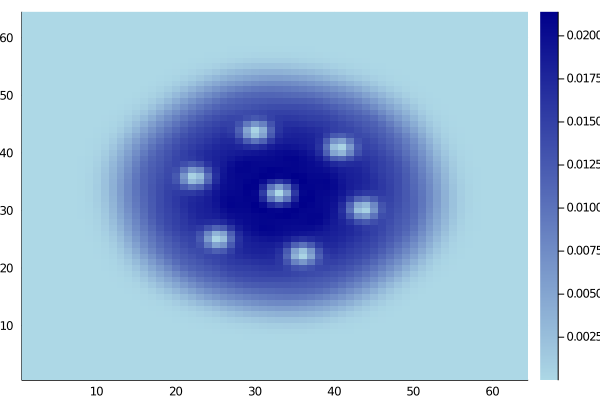

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)